In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [164]:
class LinReg:
    def __init__(self,lr=0.01,tolerance=0.001,epoch=100):
        self.lr=lr
        self.tolerance=tolerance
        self.epoch=epoch
        self.W=None
        self.b=0
        self.cost_hist=[]

    def predict(self,X):
        return np.dot(X,self.W)+self.b
    
    def fit(self,X,y,Xd,yd):
        samples,features=X.shape
        self.W=np.zeros(features)
        self.b=0
        pCost= float('inf')
        for _ in range(self.epoch+1):
            p = self.predict(X)
            e=p-y

            dW = 1/samples* np.dot(X.T, e)
            db = 1/samples*np.sum(e)

            self.W-=self.lr*dW
            self.b-=self.lr*db

            cost =(1/(2*samples))*np.sum(e ** 2)
            self.cost_hist.append(cost)
            if _%10==0:
                print("Epoch:", _)
                
                print("Train Set:")
                self.devScore(X,y)
                
                print("Dev Set:")
                self.devScore(Xd,yd)
                print()
                
            if (abs(pCost - cost)<self.tolerance):
                print('Tolerance Threshold is hit!')
                break
            pCost = cost
    
    def devScore(self,X,y):
        p = self.predict(X)
        y_mean = np.mean(y)
        tss = np.sum((y - y_mean) ** 2)
        rss = np.sum((y - p) ** 2)
        r2 = 1 - (rss / tss)
        print("R2 Score:", round(r2,3))
    
    def testScore(self, X, y):
        samples,features=X.shape
        p = self.predict(X)
        y_mean = np.mean(y)
        tss = np.sum((y - y_mean) ** 2)
        rss = np.sum((y - p) ** 2)
        r2 = 1 - (rss / tss)
        ar2 = 1 - ((1 - r2) * (samples - 1) / (samples - features - 1))
        print("R2 Score:", round(r2,3))
        print("Adjusted R2 Score:", round(ar2,3))

        plt.plot(range(len(self.cost_hist)), self.cost_hist, color='red')
        plt.title('Cost vs. Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()

In [165]:
db=pd.read_csv("./data.csv",index_col='car_ID')
db

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [166]:
#Converting strings to integers
fuelmap={'gas':0,'diesel':1}
db.fueltype=db.fueltype.replace(fuelmap)

aspmap={'std':0,'turbo':1}
db.aspiration=db.aspiration.replace(aspmap)

doormap={'four':4,'two':2}
db.doornumber=db.doornumber.replace(doormap)

wheelmap={'fwd':0,'rwd':1,'4wd':2}
db.drivewheel=db.drivewheel.replace(wheelmap)

locmap={'front':0,'rear':1}
db.enginelocation=db.enginelocation.replace(locmap)

fsmap={'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}
db.fuelsystem=db.fuelsystem.replace(fsmap)

bodymap={'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}
db.carbody=db.carbody.replace(bodymap)

emap={'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}
db.enginetype=db.enginetype.replace(emap)

c_map={'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}
db.cylindernumber=db.cylindernumber.replace(c_map)

#Dropping the CarName Feature
db=db.drop(['CarName'],axis=1)

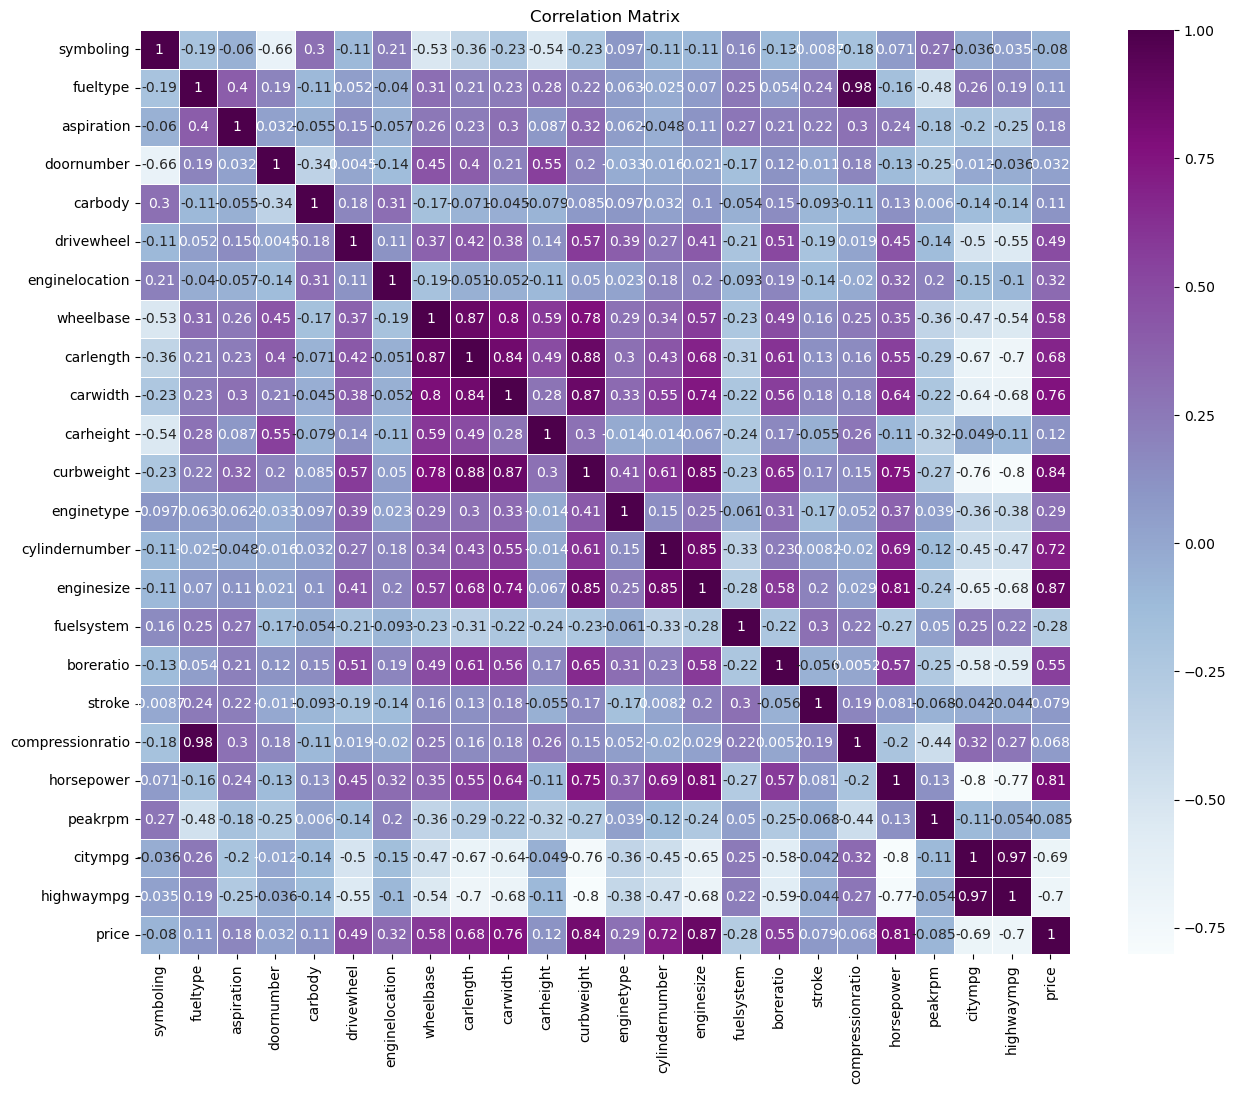

In [167]:
#Correlation matrix to figure out which features to drop
c_mat=db.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(c_mat, annot=True, cmap='BuPu', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [168]:
#Dropping all the columns that are in the range (-0.15,0.15)
db=db.drop(['symboling', 'doornumber', 'stroke', 'compressionratio', 'peakrpm','fueltype','carbody','carheight','aspiration'],axis=1)
db
# Note: Dropping only from range (-0.1,0.1) gave an adjusted R2 score of -.22 which suggests that the model is too complex
# Removing fueltype,carbody,carheight improved the AR2 score to 0.5 and removal of aspiration leads to an AR2 score of 0.6
# It is also noted that accuracy was not impacted in any way when removing these features

,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,
1,1,0,88.6,168.8,64.1,2548,3,4,130,0,3.47,111,21,27,13495.0
2,1,0,88.6,168.8,64.1,2548,3,4,130,0,3.47,111,21,27,16500.0
3,1,0,94.5,171.2,65.5,2823,2,6,152,0,2.68,154,19,26,16500.0
4,0,0,99.8,176.6,66.2,2337,0,4,109,0,3.19,102,24,30,13950.0
5,2,0,99.4,176.6,66.4,2824,0,5,136,0,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1,0,109.1,188.8,68.9,2952,0,4,141,0,3.78,114,23,28,16845.0
202,1,0,109.1,188.8,68.8,3049,0,4,141,0,3.78,160,19,25,19045.0
203,1,0,109.1,188.8,68.9,3012,2,6,173,0,3.58,134,18,23,21485.0


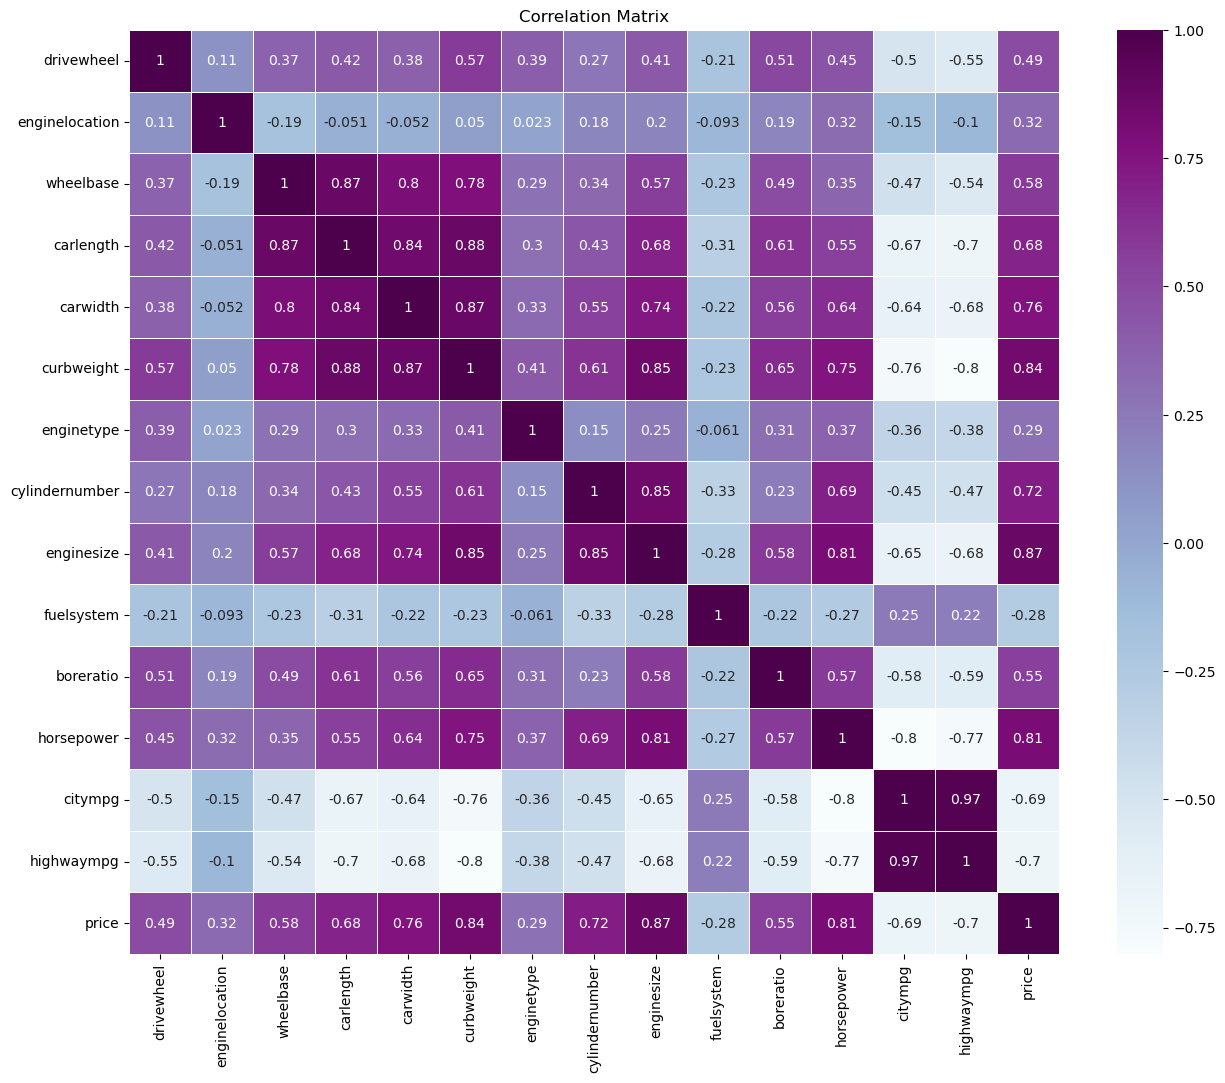

In [169]:
c_mat=db.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(c_mat, annot=True, cmap='BuPu', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [170]:
#Creating independent and dependent vectors
X=db.drop("price", axis=1)
y=db.price
X=X.to_numpy()
y=y.to_numpy()

In [171]:
#Z-Score Standardisation
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X-X_mean)
X=X/X_std

In [172]:
#Test Train Split
X_subset, X_test, y_subset, y_test = train_test_split(X, y, test_size=0.1, random_state=54)
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.1, random_state=54)

Epoch: 0
Train Set:
R2 Score: -1.682
Dev Set:
R2 Score: -0.96

Epoch: 10
Train Set:
R2 Score: 0.541
Dev Set:
R2 Score: 0.664

Epoch: 20
Train Set:
R2 Score: 0.809
Dev Set:
R2 Score: 0.858

Epoch: 30
Train Set:
R2 Score: 0.845
Dev Set:
R2 Score: 0.885

FINAL TEST SCORES:
R2 Score: 0.885
Adjusted R2 Score: 0.618


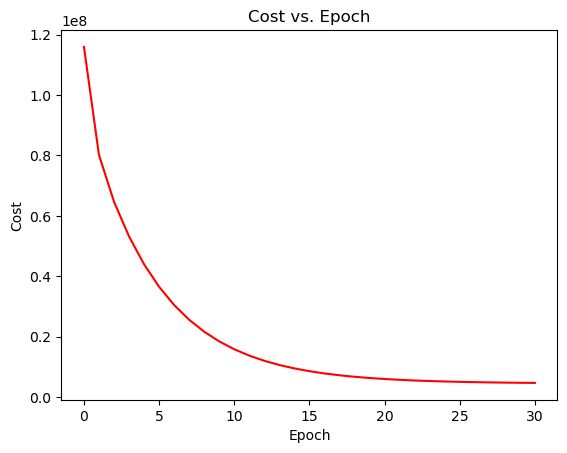

In [173]:
#Setting the init values and plotting Cost vs Epoch
lr=0.1
toler=0.01
epoch=30
model= LinReg(lr,toler,epoch)
model.fit(X_train,y_train,X_dev,y_dev)
print("FINAL TEST SCORES:")
model.testScore(X_test,y_test)
#Epoch count further than 30 will improve results minimally, hence we stop there